# **Implementing a Perceptron**

**Loading the Dataset**

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/fhsiddiqui/dl-fundamentals-sebastian/main/unit01-ml-intro/1.6-perceptron-in-python/perceptron_toydata-truncated.txt'
df = pd.read_csv(url, sep='\t')
df


x1    x2  label
0   0.77 -1.14      0
1  -0.33  1.44      0
2   0.91 -3.07      0
3  -0.37 -1.91      0
4  -0.63 -1.53      0
5   0.39 -1.99      0
6  -0.49 -2.74      0
7  -0.68 -1.52      0
8  -0.10 -3.43      0
9  -0.05 -1.95      0
10  3.88  0.65      1
11  0.73  2.97      1
12  0.83  3.94      1
13  1.59  1.25      1
14  1.14  3.91      1
15  1.73  2.80      1
16  1.31  1.85      1
17  1.56  3.85      1
18  1.23  2.54      1
19  1.33  2.03      1

In [6]:
X_train = df[["x1","x2"]].values
y_train = df["label"].values

In [11]:
print(X_train.shape)
print(X_train)

(20, 2)
[[ 0.77 -1.14]
 [-0.33  1.44]
 [ 0.91 -3.07]
 [-0.37 -1.91]
 [-0.63 -1.53]
 [ 0.39 -1.99]
 [-0.49 -2.74]
 [-0.68 -1.52]
 [-0.1  -3.43]
 [-0.05 -1.95]
 [ 3.88  0.65]
 [ 0.73  2.97]
 [ 0.83  3.94]
 [ 1.59  1.25]
 [ 1.14  3.91]
 [ 1.73  2.8 ]
 [ 1.31  1.85]
 [ 1.56  3.85]
 [ 1.23  2.54]
 [ 1.33  2.03]]


In [13]:
print(y_train.shape)
print(y_train)

(20,)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [16]:
import numpy as np
# If y_train contains class labels like:

# python
# Copy code
# y_train = [0, 1, 1, 2, 2, 2, 3]
# Running:

# python
# Copy code
# np.bincount(y_train)
# Produces:

# python
# Copy code
# array([1, 2, 3, 1])
# This means:

# Class 0 appears 1 time,
# Class 1 appears 2 times,
# Class 2 appears 3 times,
# Class 3 appears 1 time.
# Common Use Case:
# np.bincount is often used in machine learning to analyze
# class imbalances in classification tasks. For example,
# you might use it to verify if y_train has balanced or imbalanced class distributions.
np.bincount(y_train)

array([10, 10])

# **Visualizing the dataset**

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

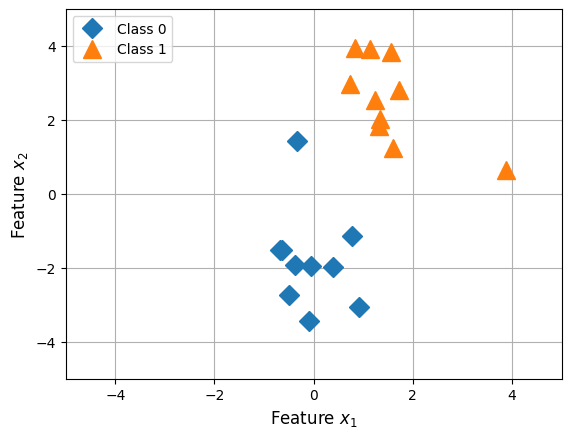

In [20]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

# **Implementing the Perceptron**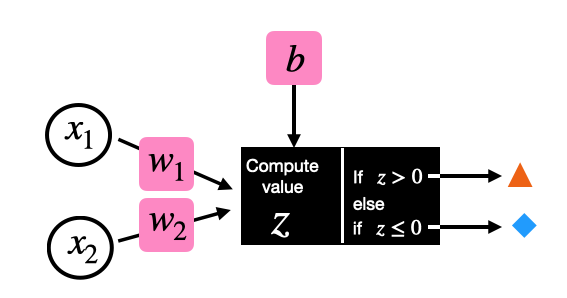

In [30]:
class Perception:
  def __init__(self,num_features):
    self.num_features = num_features
    # self.weights = np.zeros(num_features)
    self.weights = [0.0 for _ in range(num_features)]
    self.bais = 0.0

In [31]:
ppn = Perception(num_features = 2)
ppn.weights


[0.0, 0.0]

In [32]:
ppn.bais

0.0

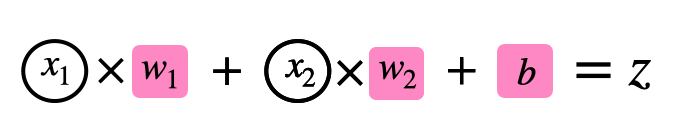